In [30]:
from bluesky import RunEngine
from bluesky.plans import count
from bluesky.callbacks import LiveTable, LivePlot
from ophyd.sim import noisy_det

## Ophyd details

In [31]:
noisy_det.describe()

OrderedDict([('noisy_det',
              {'source': 'SIM:noisy_det',
               'dtype': 'number',
               'shape': [],
               'precision': 3})])

In [32]:
noisy_det.read()

OrderedDict([('noisy_det',
              {'value': 0.11005883131499064, 'timestamp': 1724688782.918191})])

In [33]:
RE = RunEngine()

## Count

In [34]:
RE(
    count([noisy_det], num=5, delay=1),
    LiveTable(["noisy_det"]))



+-----------+------------+------------+
|   seq_num |       time |  noisy_det |
+-----------+------------+------------+
|         1 | 13:45:18.8 |      0.208 |


|         2 | 13:45:19.8 |      0.158 |
|         3 | 13:45:20.8 |      0.191 |
|         4 | 13:45:21.8 |      0.063 |
|         5 | 13:45:22.8 |      0.185 |
+-----------+------------+------------+
generator count ['6779869e'] (scan num: 1)




('6779869e-251d-45b6-8956-cf36bec9d43d',)

('cc63a4c1-c238-4a39-a996-1337d11172a7',)

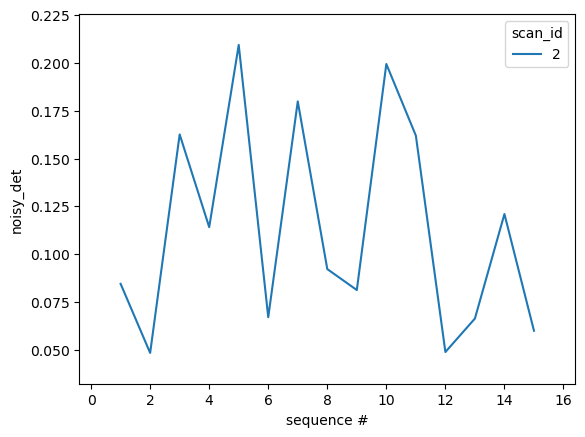

In [35]:
RE(
    count([noisy_det], num=15, delay=0.1),
    LivePlot(y="noisy_det"))